In [ ]:
from google.colab import files
uploaded = files.upload()

# Step 4: Load the data
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
data = pd.read_excel(file_name)
y3 = data['Y3']  # Extract 'y3' column

Saving Sim_2.xls to Sim_2.xls


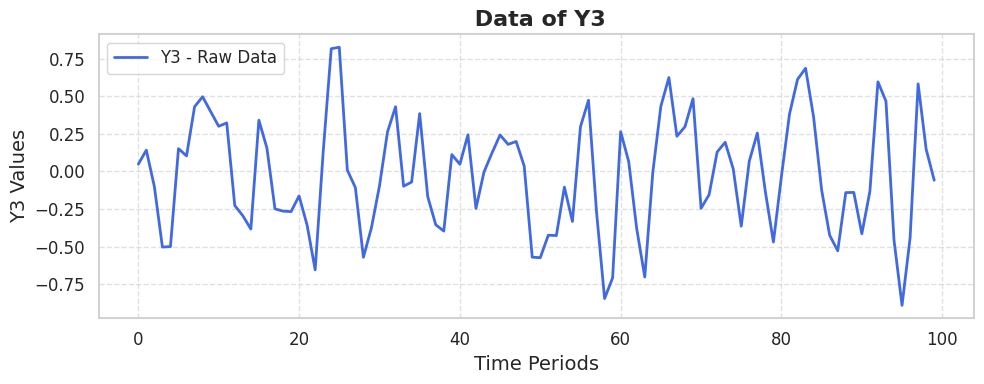

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plot
sns.set(style="whitegrid")

# Step 1: Plotting the raw data (y3)
plt.figure(figsize=(10, 4))

# Plotting with enhanced style
plt.plot(y3, label="Y3 - Raw Data", color='royalblue', linewidth=2)

# Adding title and labels
plt.title(" Data of Y3", fontsize=16, fontweight='bold')
plt.xlabel("Time Periods", fontsize=14)
plt.ylabel("Y3 Values", fontsize=14)

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjusting tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a legend
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.savefig('y3_raw_data_white_background.png', bbox_inches='tight', dpi=300)

plt.show()


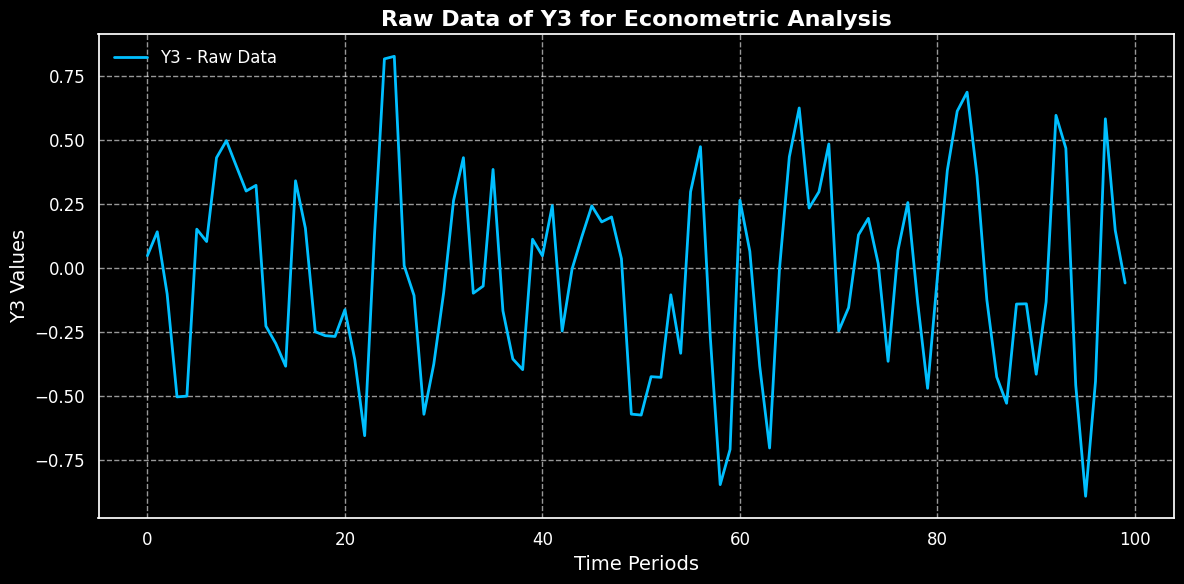

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for a black background
plt.style.use('dark_background')

# Step 1: Plotting the raw data (y3)
plt.figure(figsize=(12, 6))

# Plotting with enhanced style
plt.plot(y3, label="Y3 - Raw Data", color='deepskyblue', linewidth=2)

# Adding title and labels
plt.title("Raw Data of Y3 for Econometric Analysis", fontsize=16, fontweight='bold', color='white')
plt.xlabel("Time Periods", fontsize=14, color='white')
plt.ylabel("Y3 Values", fontsize=14, color='white')

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.6, color='white')

# Adjusting tick labels
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Adding a legend
plt.legend(fontsize=12, loc='upper left', frameon=False, labelcolor='white')

# Display the plot
plt.tight_layout()
plt.show()


       Model  Log Likelihood        AIC        BIC  Durbin-Watson  \
0      AR(1)      -32.823435  71.646870  79.462381       1.544914   
1      AR(2)      -19.801277  47.602554  58.023235       1.967945   
2  ARMA(1,1)      -25.137588  58.275176  68.695857       1.925648   
3  ARMA(2,1)      -19.789807  49.579614  62.605465       1.981830   
4  ARMA(2,2)      -16.586494  45.172989  60.804010       1.901354   
5  ARMA(2,3)      -17.500094  49.000188  67.236380       1.957352   

   Residual Std. Dev  
0           0.337285  
1           0.295432  
2           0.311980  
3           0.295396  
4           0.285793  
5           0.288512  


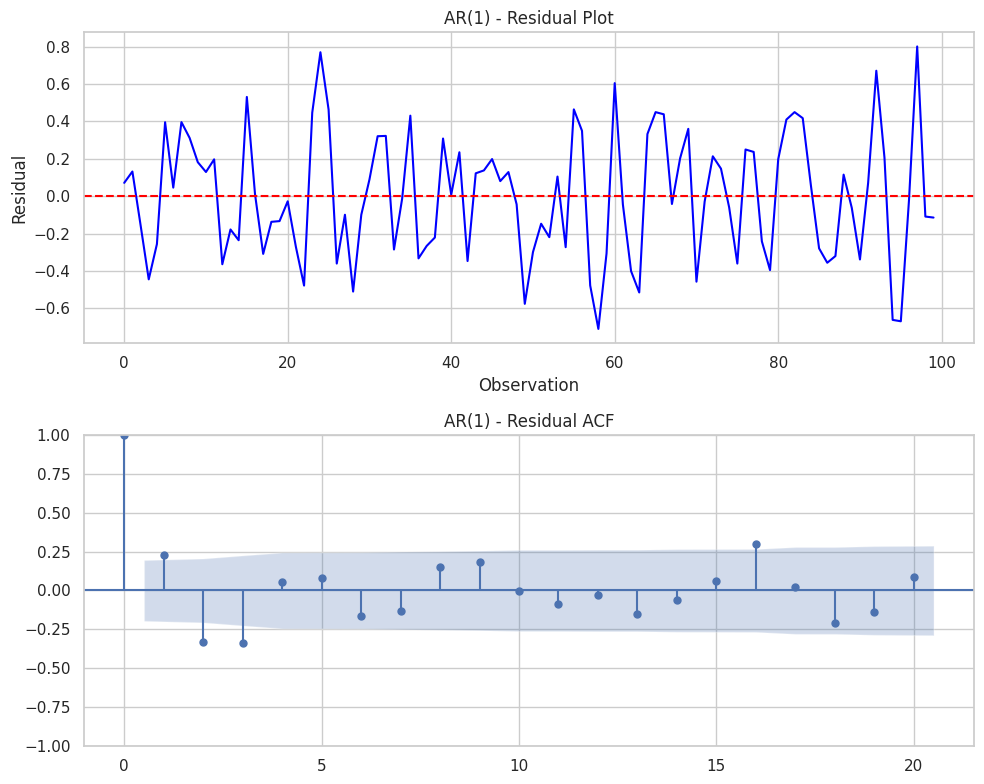

Ljung-Box Test for AR(1) Residuals:
      lb_stat  lb_pvalue
10  41.236569    0.00001


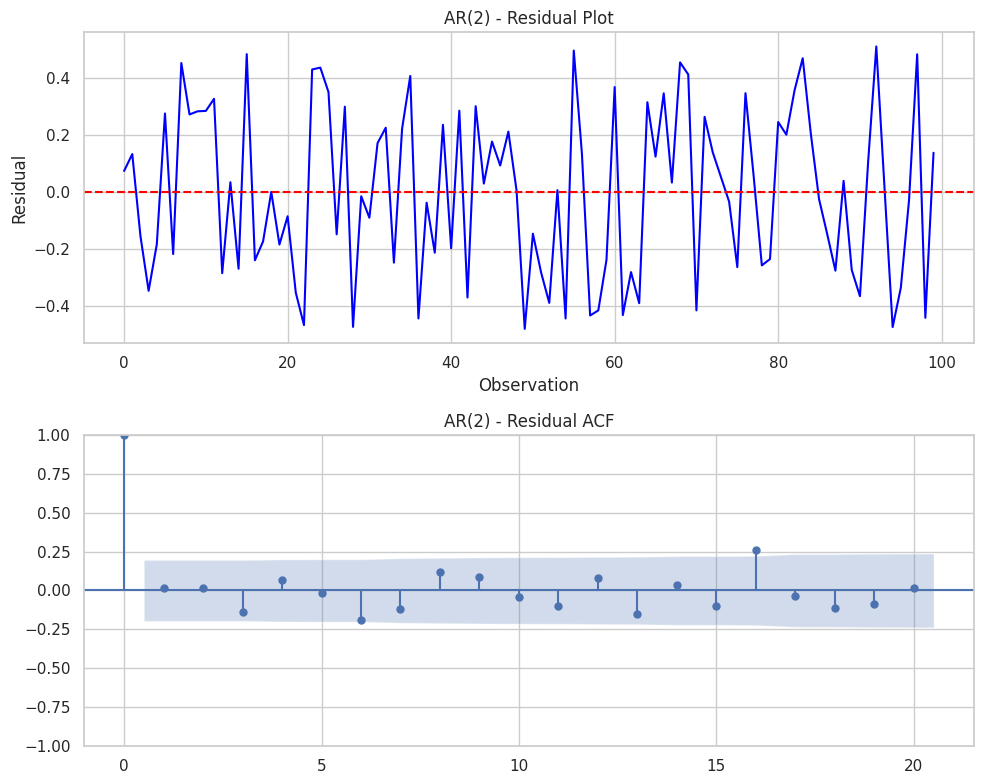

Ljung-Box Test for AR(2) Residuals:
      lb_stat  lb_pvalue
10  10.483276   0.399164


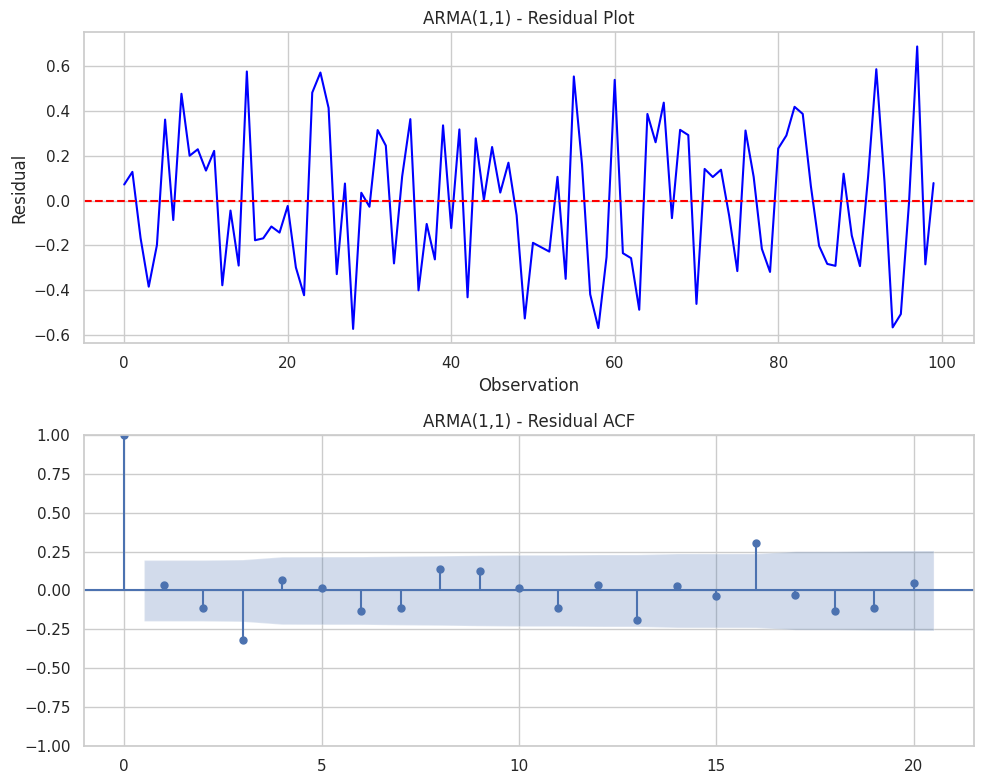

Ljung-Box Test for ARMA(1,1) Residuals:
      lb_stat  lb_pvalue
10  19.795792   0.031244


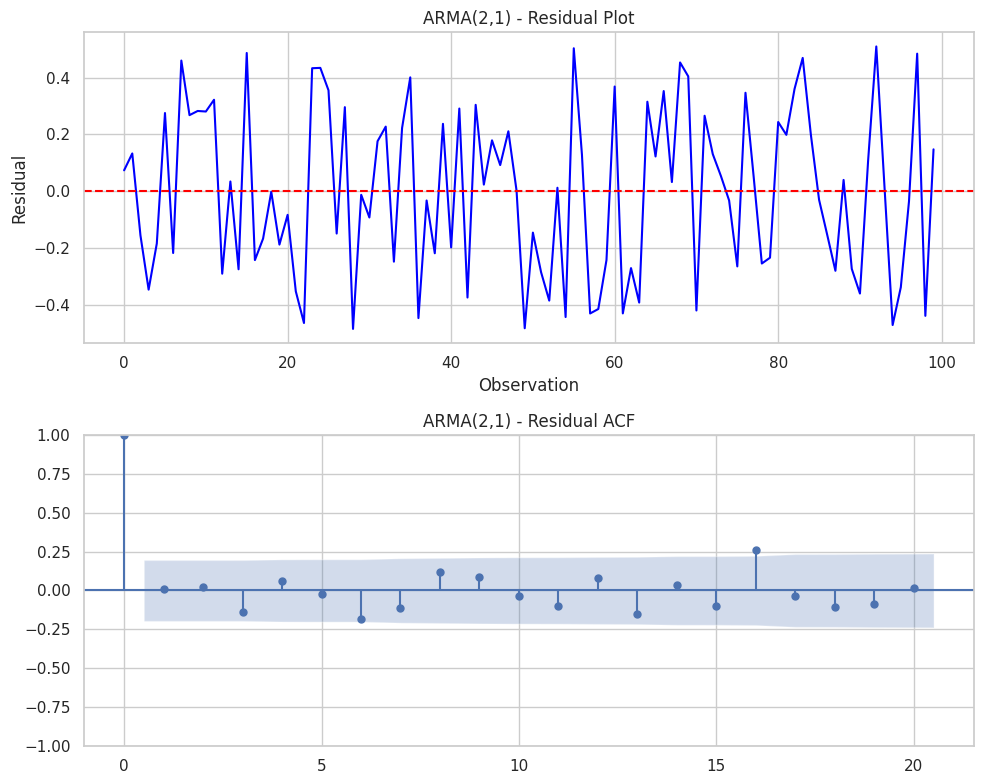

Ljung-Box Test for ARMA(2,1) Residuals:
      lb_stat  lb_pvalue
10  10.287268   0.415662


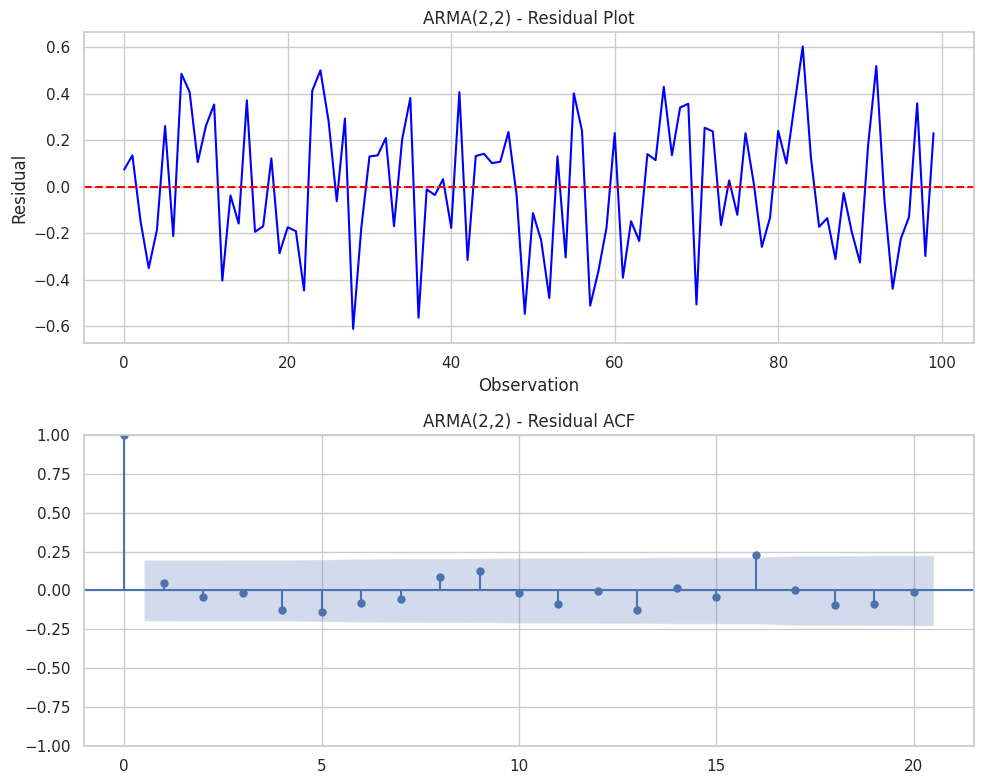

Ljung-Box Test for ARMA(2,2) Residuals:
     lb_stat  lb_pvalue
10  7.948255   0.633891


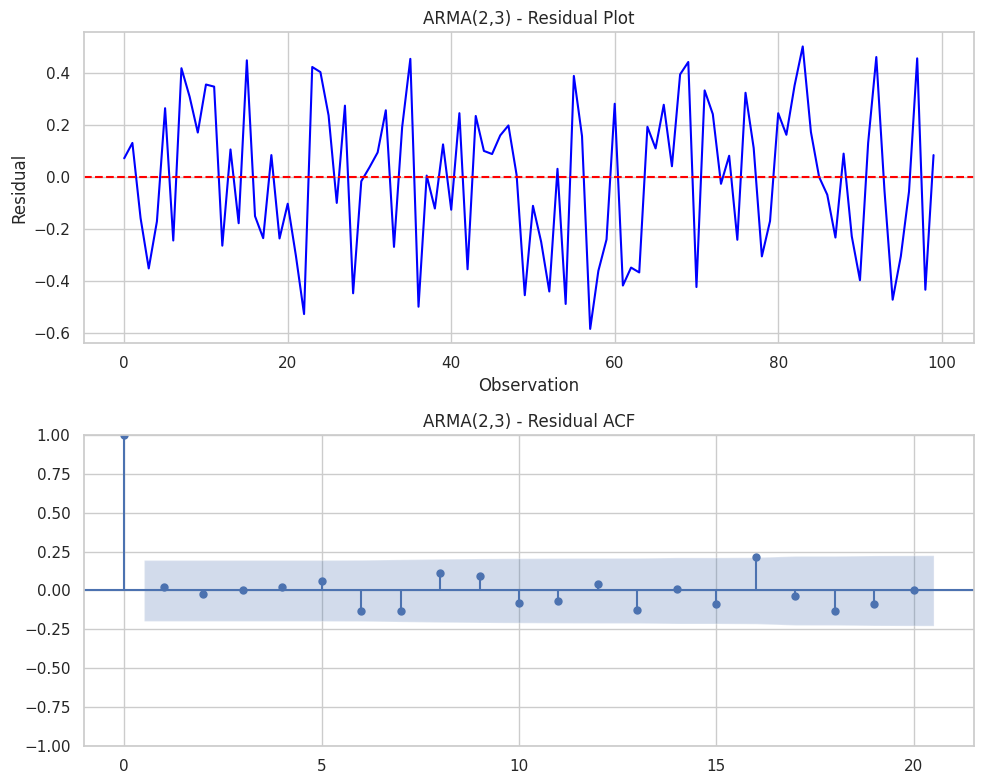

Ljung-Box Test for ARMA(2,3) Residuals:
     lb_stat  lb_pvalue
10  7.275185   0.699235


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson



# Step 2: Function to fit models and summarize results
def fit_model(order, model_name):
    model = ARIMA(y3, order=order)
    result = model.fit()
    summary = {
        "Model": model_name,
        "Log Likelihood": result.llf,
        "AIC": result.aic,
        "BIC": result.bic,
        "Durbin-Watson": durbin_watson(result.resid),
        "Residual Std. Dev": result.resid.std()
    }
    return result, summary

# Fit models
models = {
    "AR(1)": (1, 0, 0),
    "AR(2)": (2, 0, 0),
    "ARMA(1,1)": (1, 0, 1),
    "ARMA(2,1)": (2, 0, 1),
    "ARMA(2,2)": (2, 0, 2),
    "ARMA(2,3)": (2, 0, 3)

}

results = {}
summary_table = []

for model_name, order in models.items():
    result, summary = fit_model(order, model_name)
    results[model_name] = result
    summary_table.append(summary)

# Convert summary table to DataFrame
summary_df = pd.DataFrame(summary_table)
print(summary_df)

# Step 3: Residual Analysis and Plotting
def residual_analysis(result, model_name):
    residuals = result.resid

    # Plot residuals and ACF
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    sns.lineplot(x=range(len(residuals)), y=residuals, ax=axes[0], color="blue")
    axes[0].axhline(0, color='red', linestyle='--')
    axes[0].set_title(f'{model_name} - Residual Plot')
    axes[0].set_xlabel("Observation")
    axes[0].set_ylabel("Residual")

    # ACF plot of residuals
    from statsmodels.graphics.tsaplots import plot_acf
    plot_acf(residuals, lags=20, ax=axes[1])
    axes[1].set_title(f'{model_name} - Residual ACF')

    plt.tight_layout()
    plt.show()

    # Ljung-Box test
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    print(f"Ljung-Box Test for {model_name} Residuals:")
    print(lb_test)

# Perform residual analysis for each model
for model_name, result in results.items():
    residual_analysis(result, model_name)


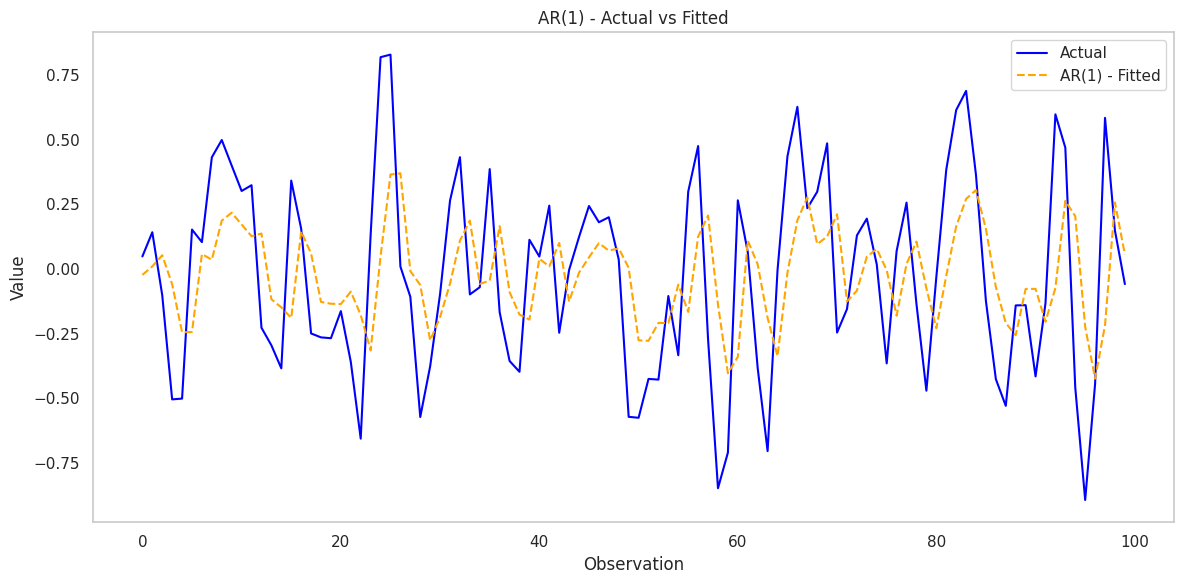

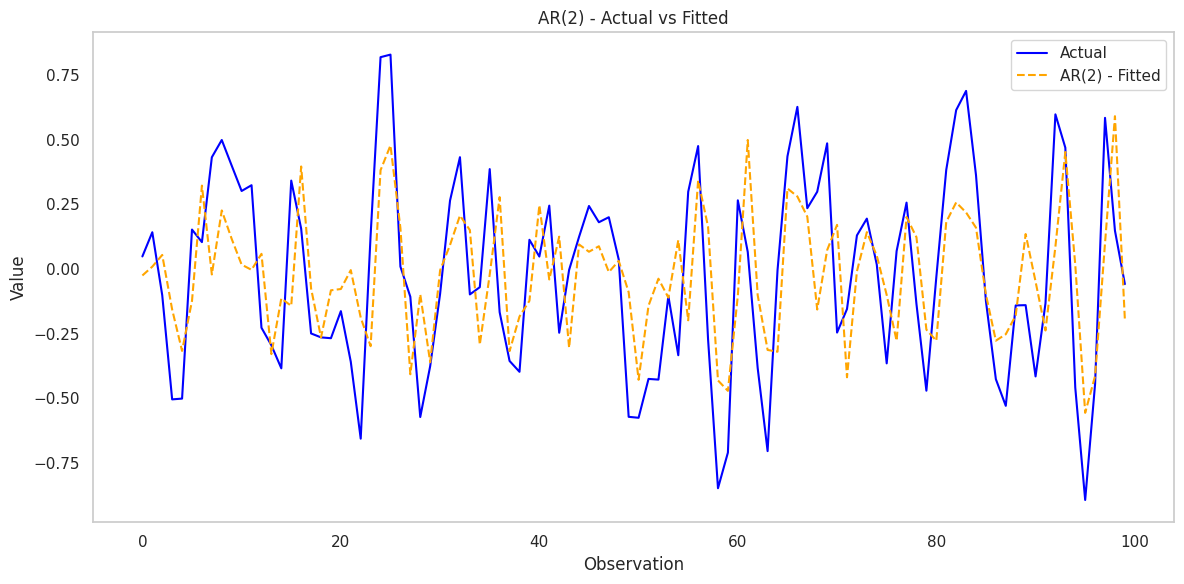

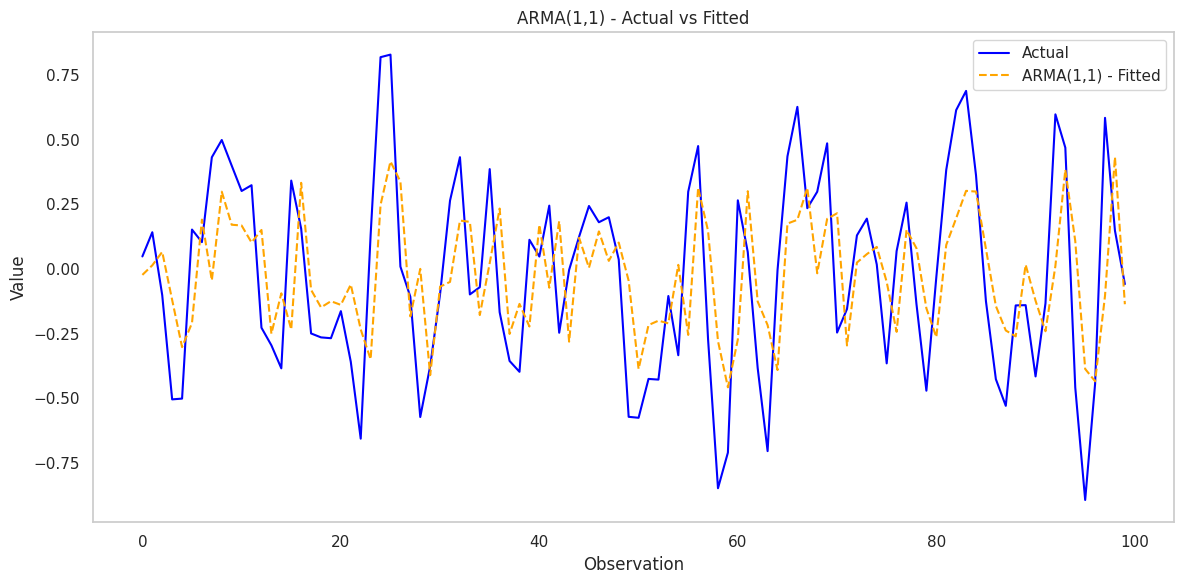

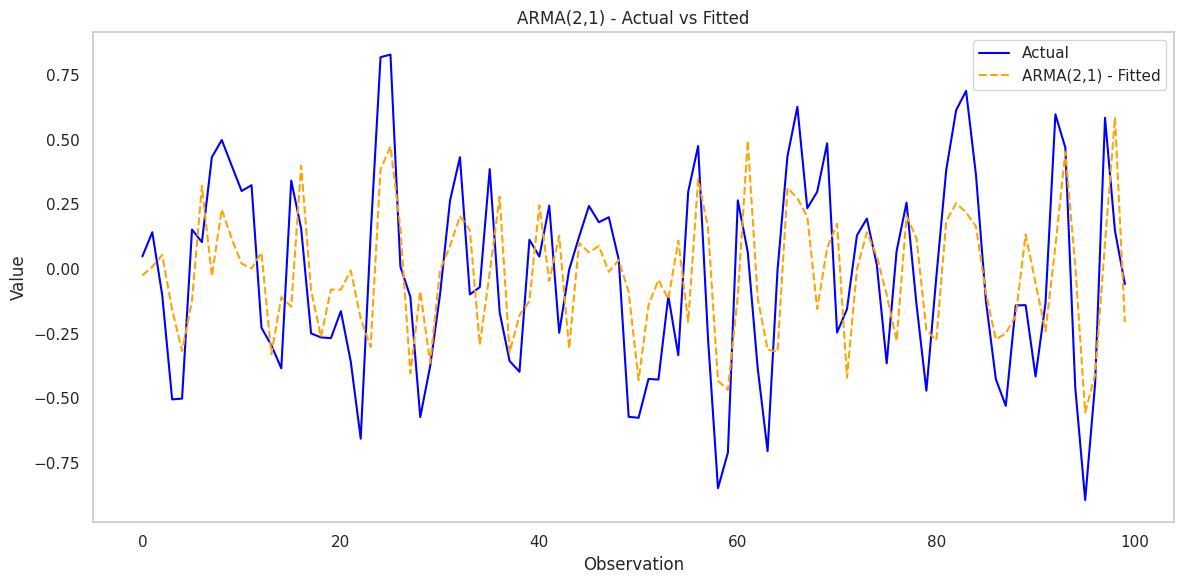

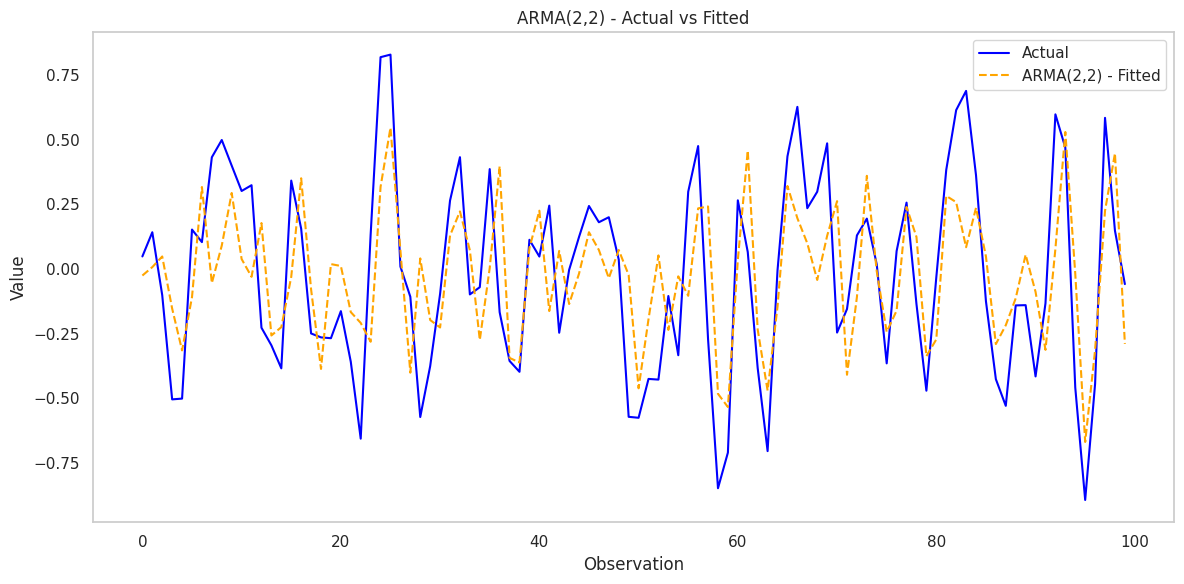

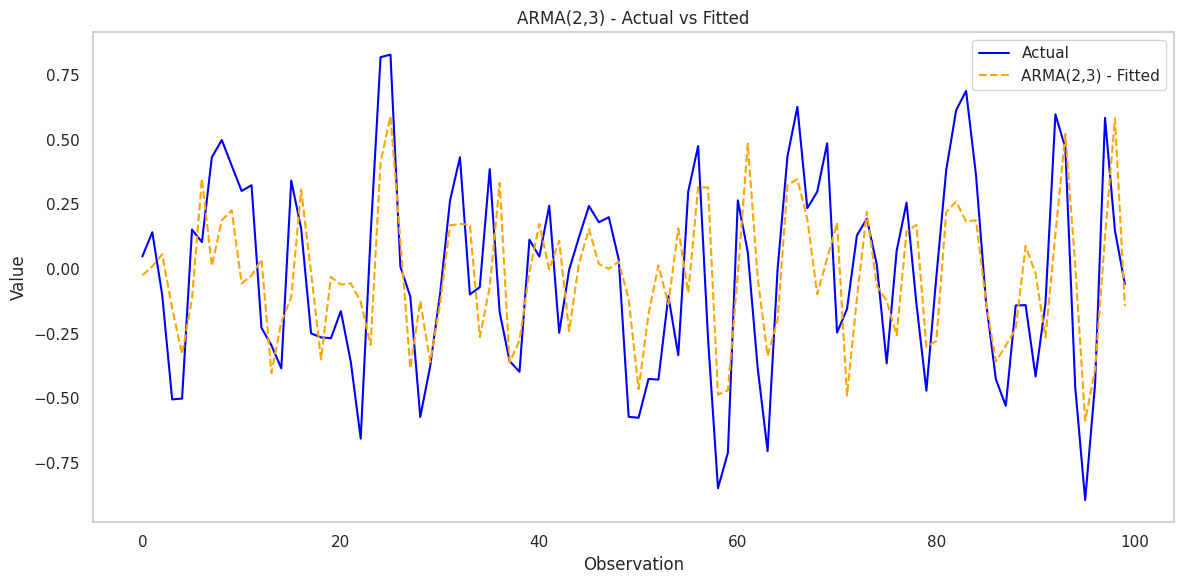

In [ ]:
# Step 4: Fit the models to the data and plot the results
def plot_fitted_vs_actual(result, model_name):
    # Get the fitted values
    fitted_values = result.fittedvalues

    # Plot actual vs fitted values
    plt.figure(figsize=(12, 6))
    plt.plot(y3, label='Actual', color='blue', linestyle='-', linewidth=1.5)
    plt.plot(fitted_values, label=f'{model_name} - Fitted', color='orange', linestyle='--', linewidth=1.5)
    plt.title(f"{model_name} - Actual vs Fitted")
    plt.xlabel("Observation")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Fit the models and plot the results
for model_name, result in results.items():
    plot_fitted_vs_actual(result, model_name)


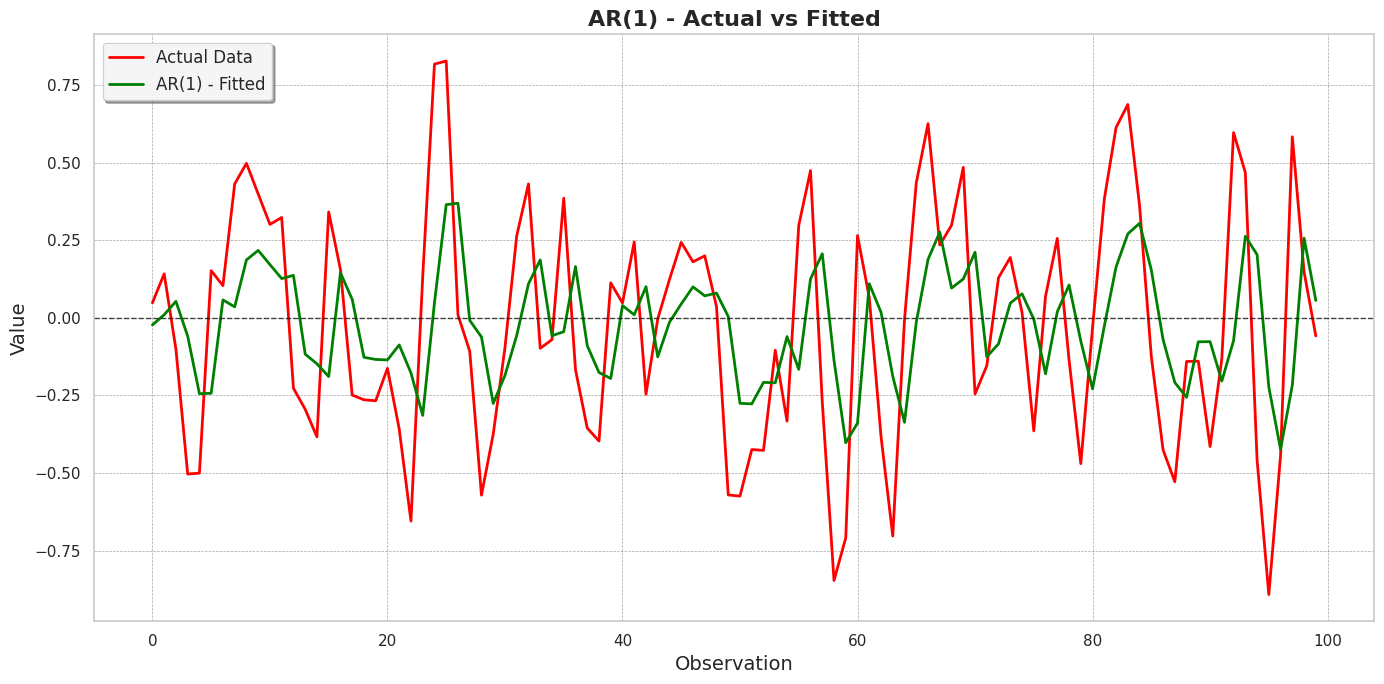

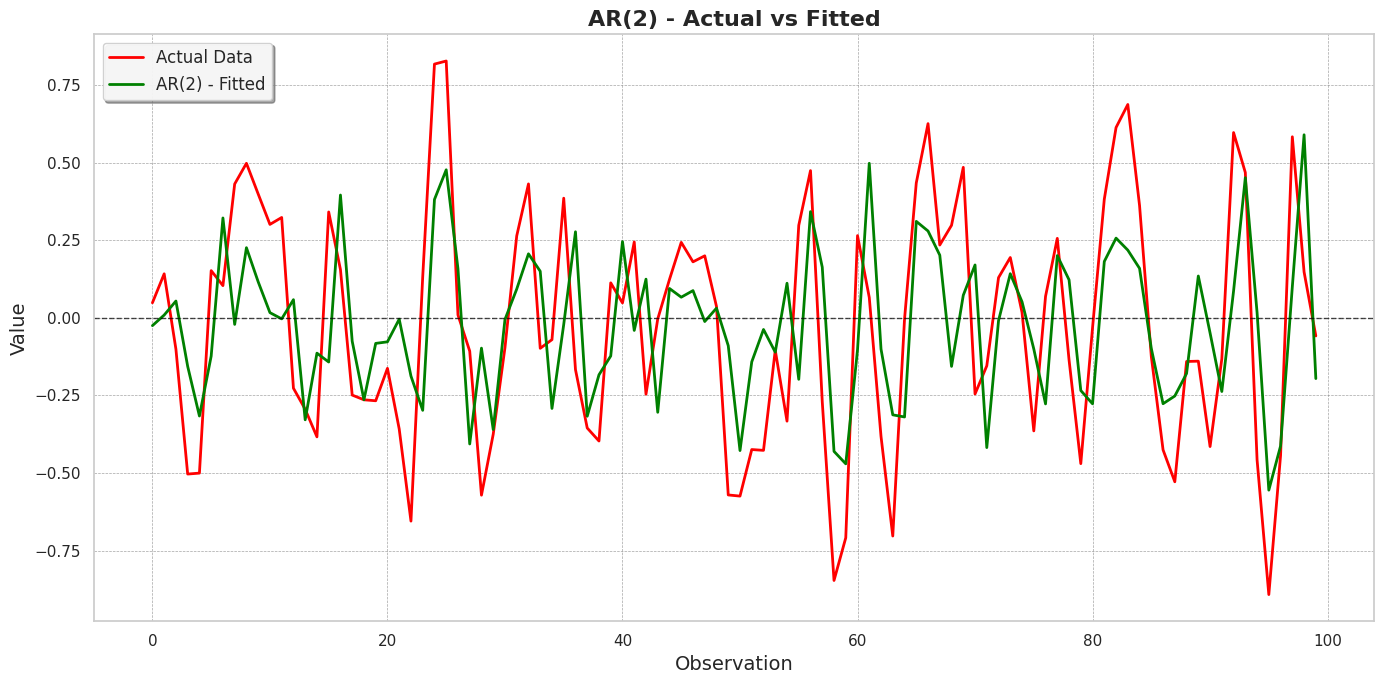

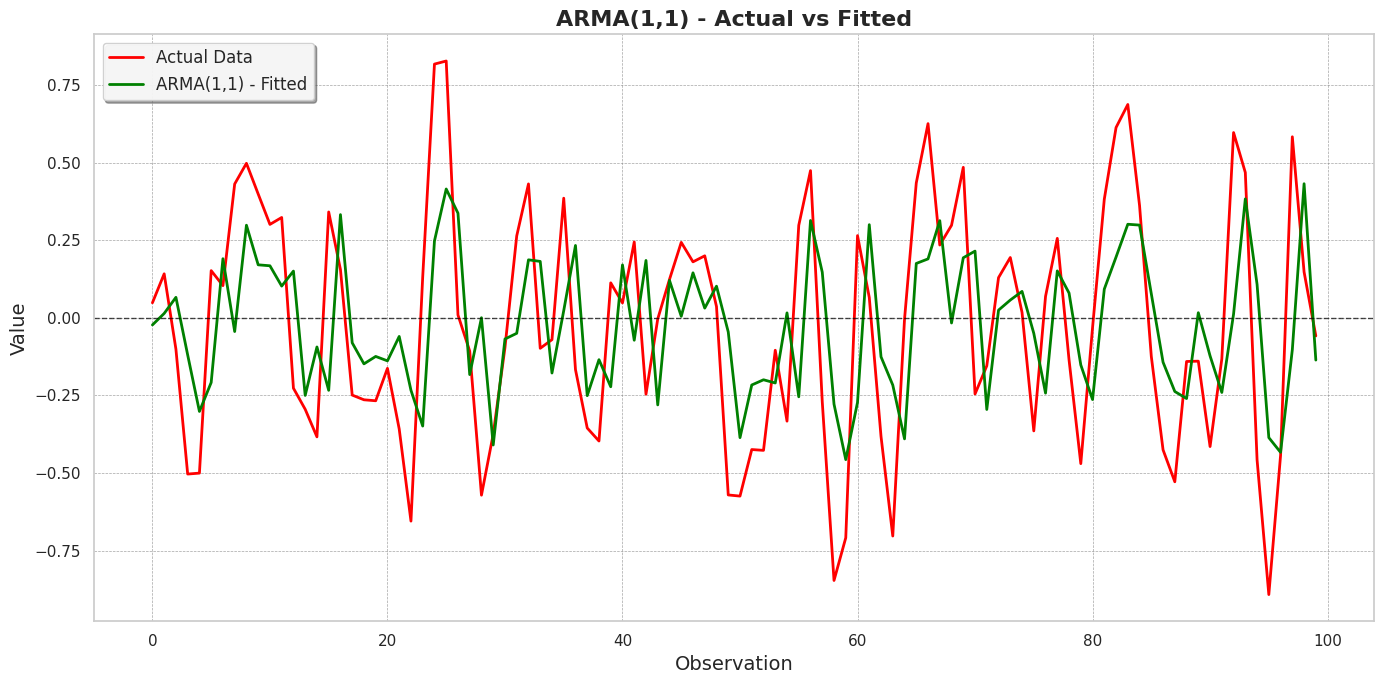

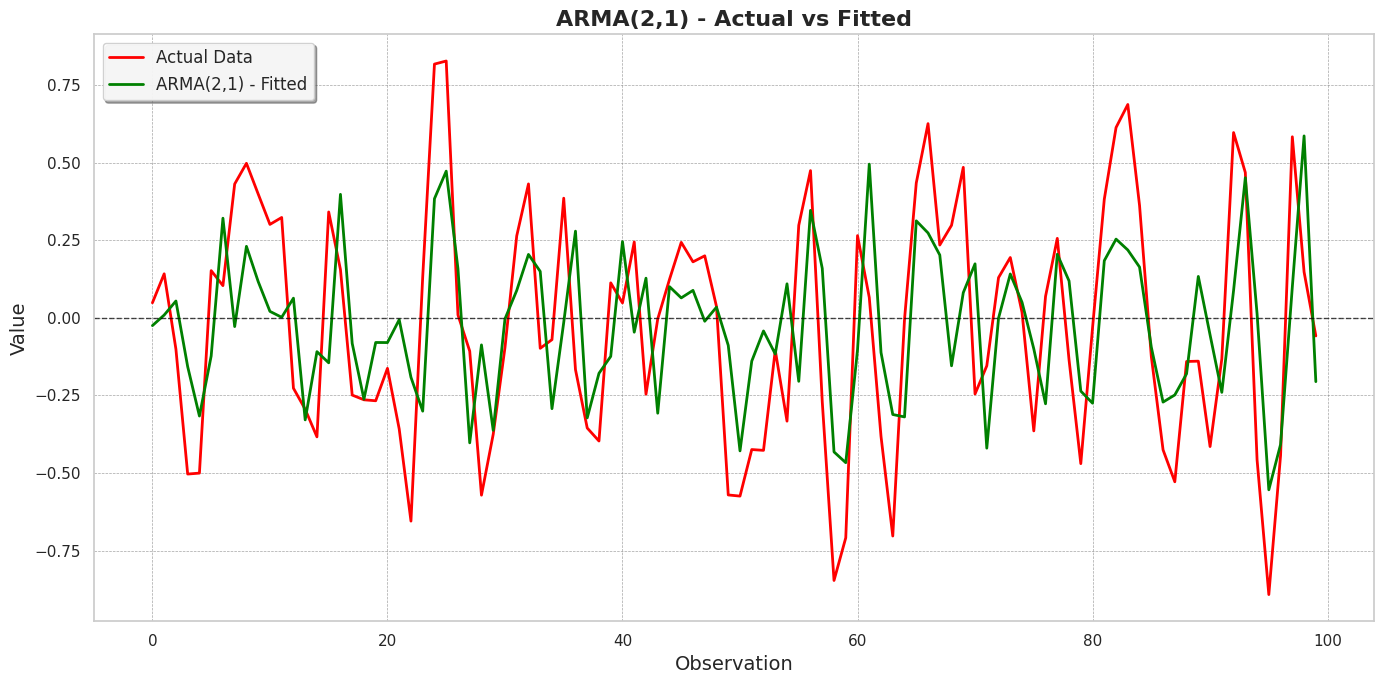

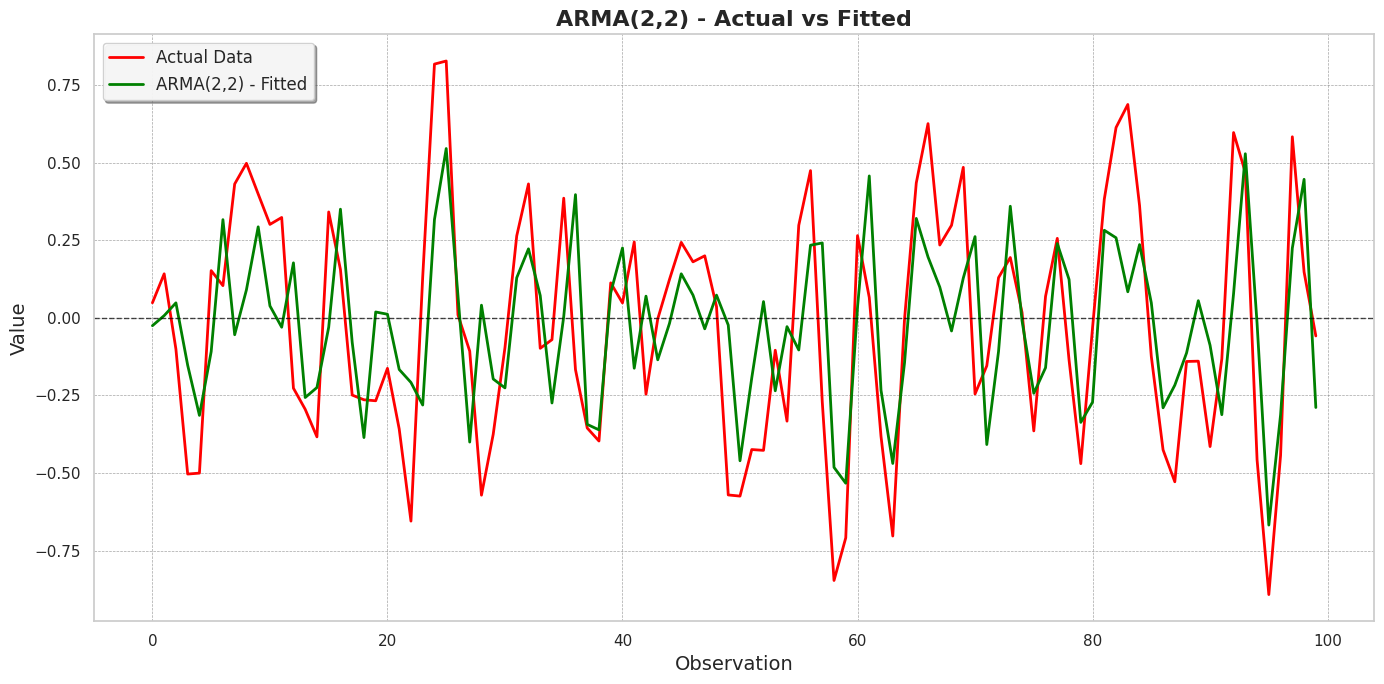

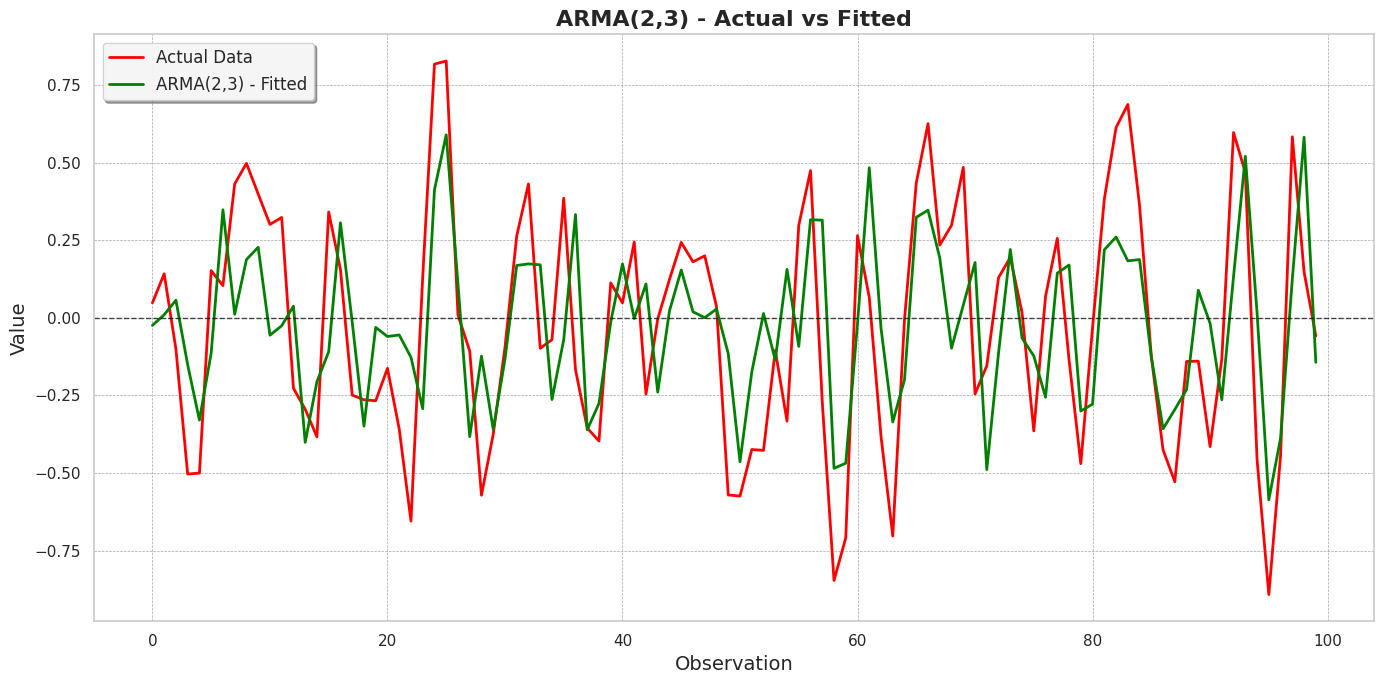

In [ ]:
# Step 4: Fit the models to the data and plot the results with enhanced visuals
def plot_fitted_vs_actual(result, model_name):
    # Get the fitted values
    fitted_values = result.fittedvalues

    # Create a larger and cleaner plot
    plt.figure(figsize=(14, 7))

    # Plot actual data
    sns.lineplot(x=range(len(y3)), y=y3, label='Actual Data', color='red', linewidth=2)

    # Plot fitted values
    sns.lineplot(x=range(len(fitted_values)), y=fitted_values,
                 label=f'{model_name} - Fitted', color='green', linewidth=2)

    # Highlight the residuals (optional, for better insight)
    residuals = y3 - fitted_values
    # plt.scatter(range(len(residuals)), residuals, label="Residuals", color="gray", alpha=0.5, s=10)

    # Add annotations for econometric analysis
    plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)  # Zero line for residual perspective
    plt.title(f"{model_name} - Actual vs Fitted", fontsize=16, weight='bold')
    plt.xlabel("Observation", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.legend(fontsize=12, loc='upper left', frameon=True, framealpha=0.9, fancybox=True, shadow=True)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    # Add tight layout for better spacing
    plt.tight_layout()

    # Display the plot
    plt.show()

# Plot for all models
for model_name, result in results.items():
    plot_fitted_vs_actual(result, model_name)


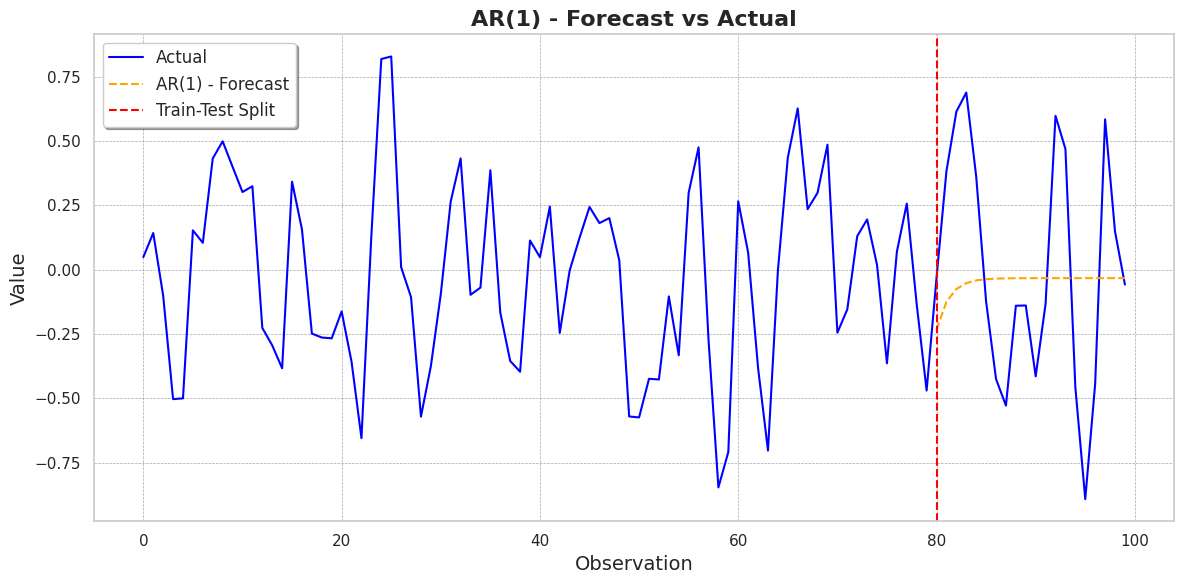

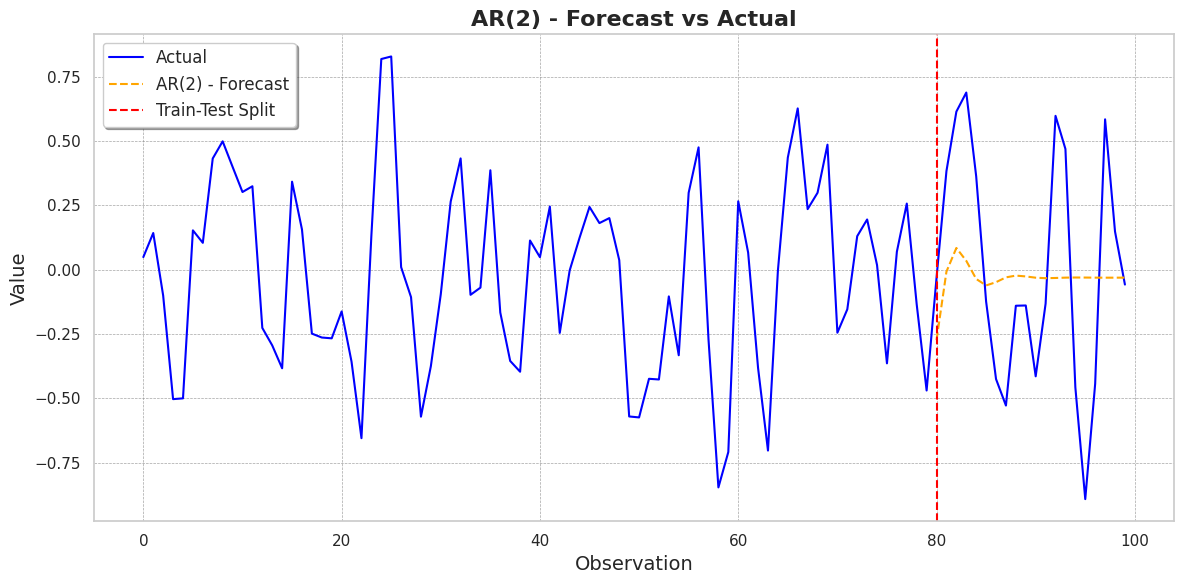

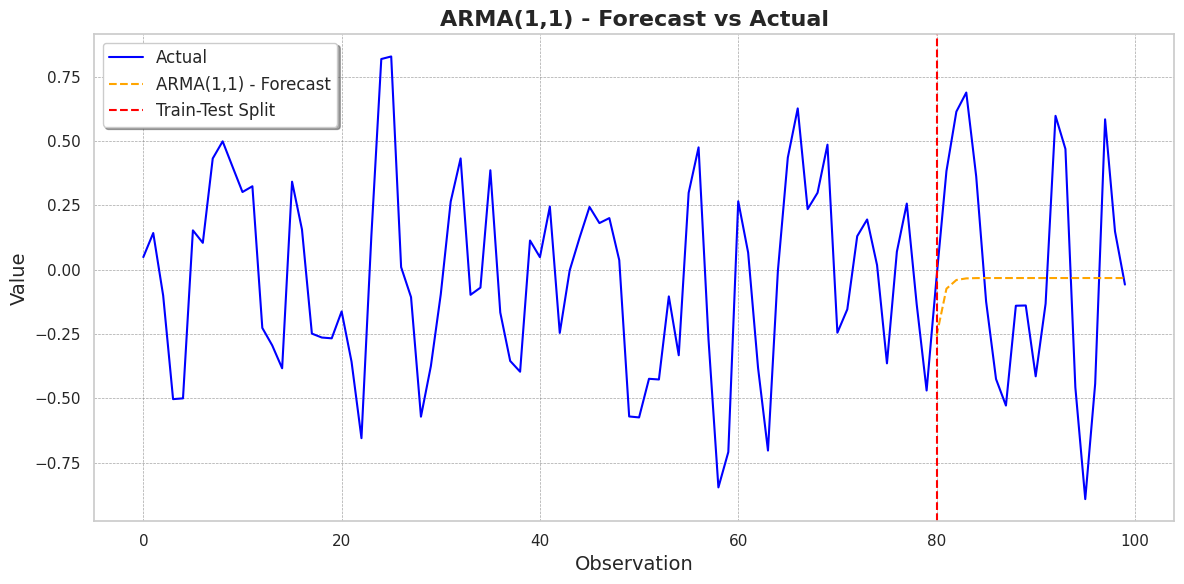

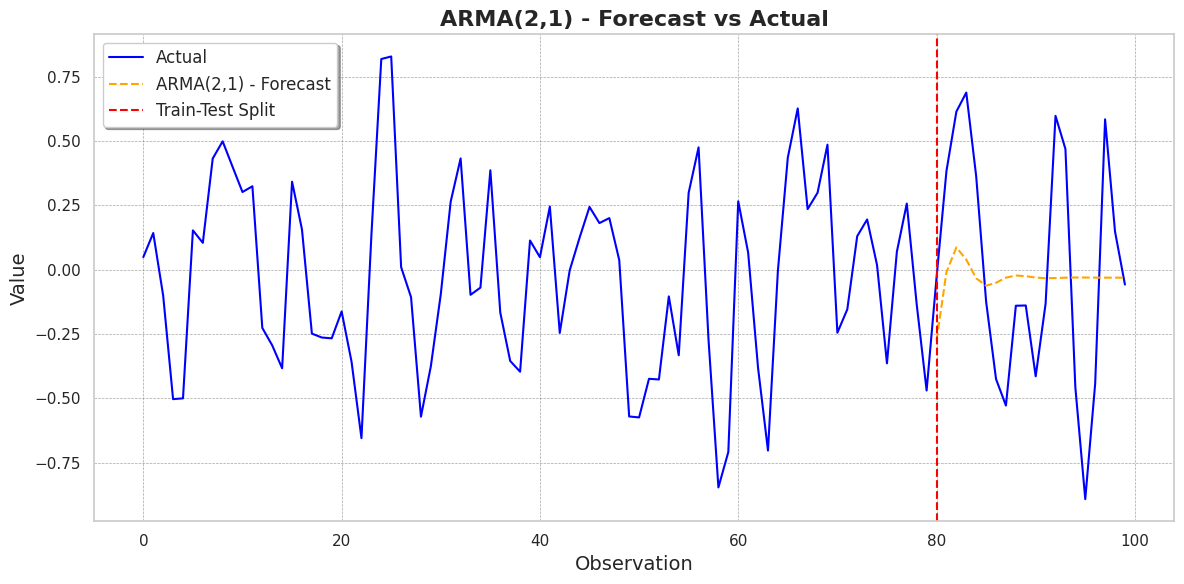

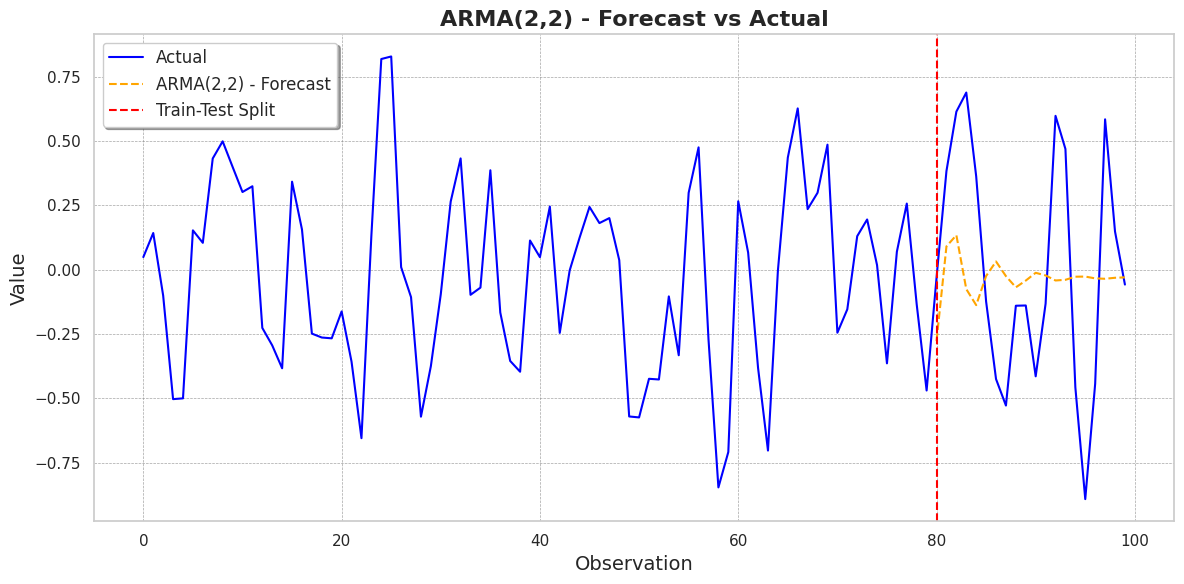

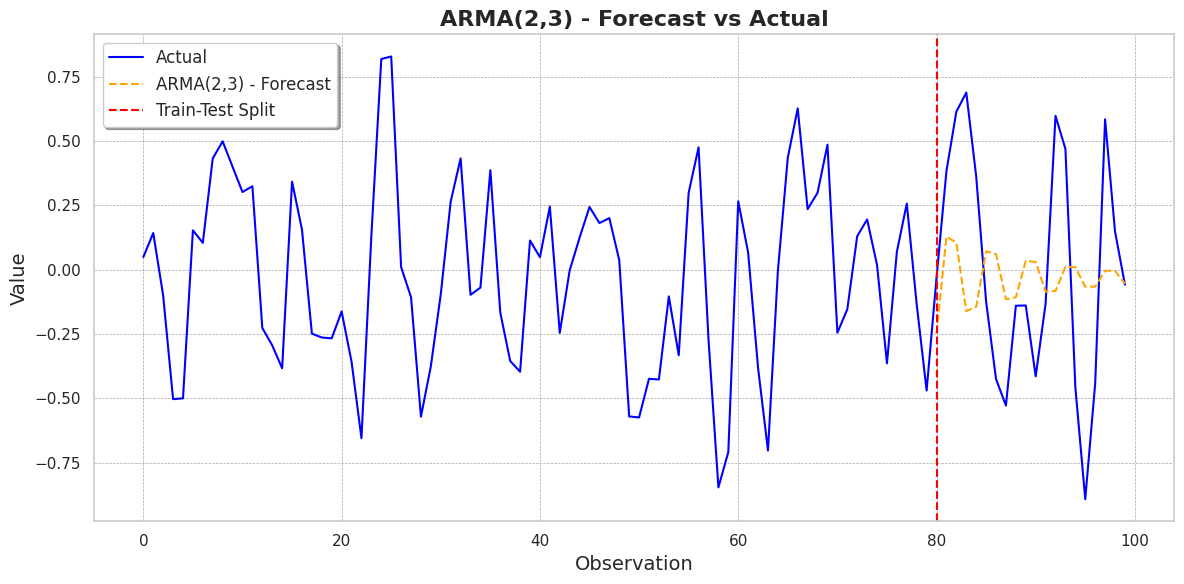

       Model       MAE      RMSE    MAPE (%)
0      AR(1)  0.392874  0.459176  122.152171
1      AR(2)  0.375777  0.436267  124.611494
2  ARMA(1,1)  0.388956  0.452867  125.124971
3  ARMA(2,1)  0.375396  0.435722  124.816972
4  ARMA(2,2)  0.385033  0.450241  126.945557
5  ARMA(2,3)  0.383976  0.453146  122.075320


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split the data into 80% training and 20% testing
split_idx = int(len(y3) * 0.8)
train_data = y3[:split_idx]
test_data = y3[split_idx:]

# Function to calculate evaluation metrics
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

# Forecasting and evaluation for each model
forecast_results = []

for model_name, order in models.items():
    # Fit model on training data
    model = ARIMA(train_data, order=order)
    result = model.fit()

    # Forecast on the test set
    forecast = result.forecast(steps=len(test_data))

    # Calculate metrics
    mae, rmse, mape = calculate_metrics(test_data, forecast)

    # Store results
    forecast_results.append({
        "Model": model_name,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE (%)": mape
    })

    # Plot actual vs forecasted
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y3)), y3, label='Actual', color='blue', linestyle='-', linewidth=1.5)
    plt.plot(range(split_idx, len(y3)), forecast, label=f'{model_name} - Forecast', color='orange', linestyle='--', linewidth=1.5)
    plt.axvline(split_idx, color='red', linestyle='--', label='Train-Test Split')
    plt.title(f"{model_name} - Forecast vs Actual", fontsize=16, weight='bold')
    plt.xlabel("Observation", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.legend(fontsize=12, loc='upper left', frameon=True, fancybox=True, shadow=True)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

# Display evaluation results
forecast_results_df = pd.DataFrame(forecast_results)
print(forecast_results_df)


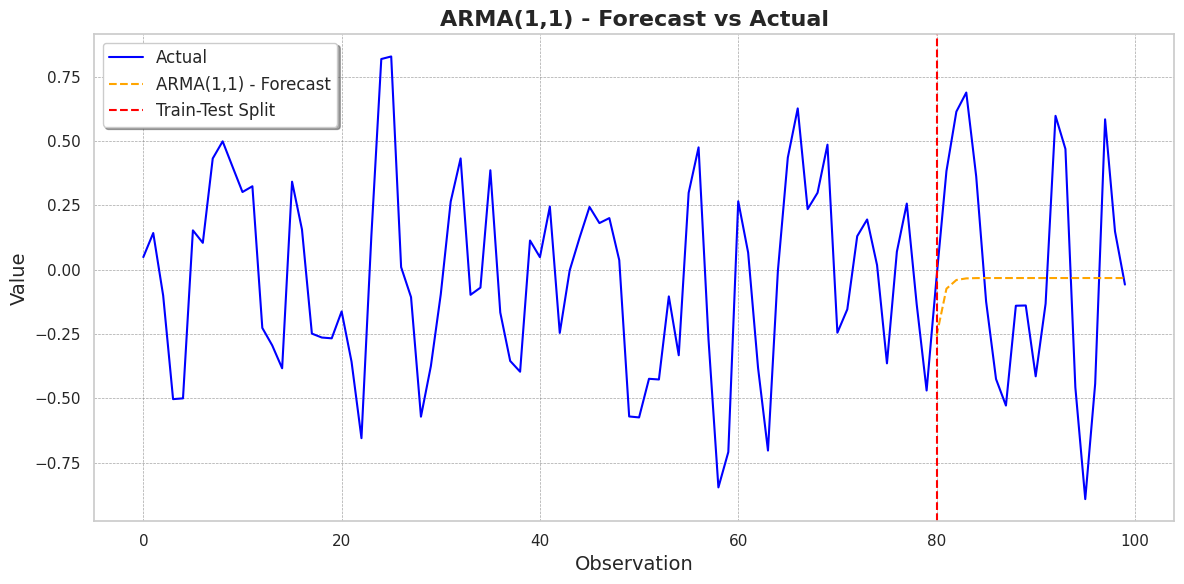

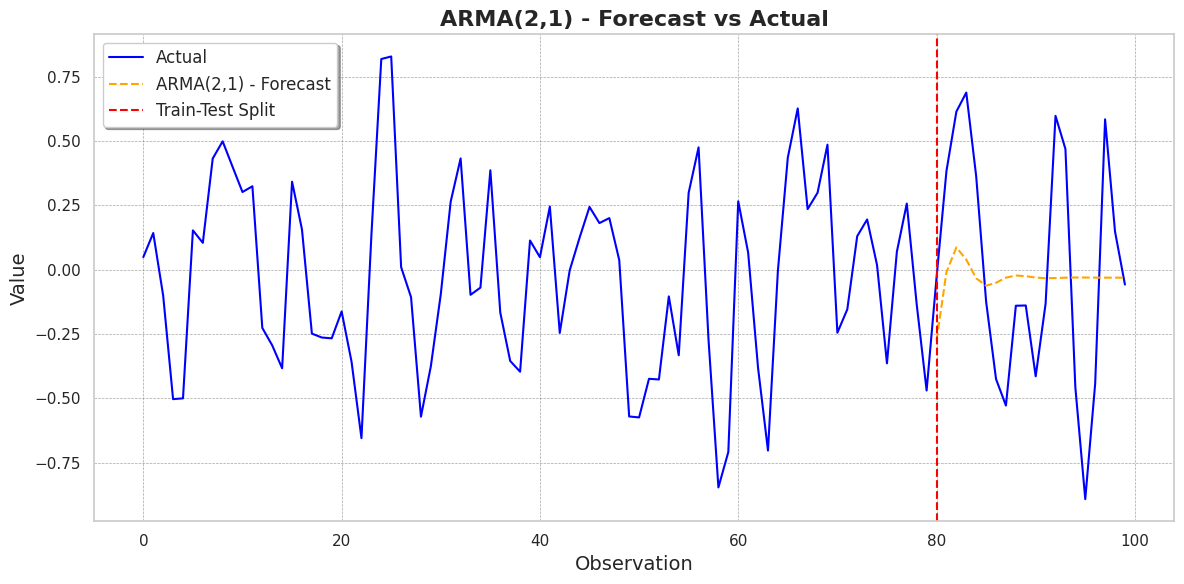

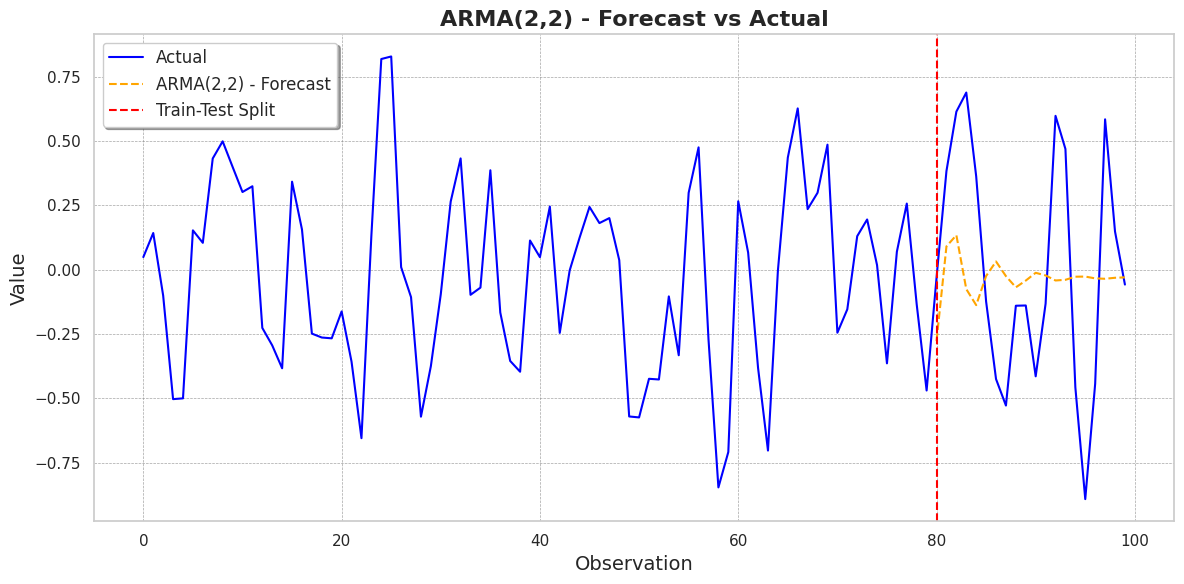

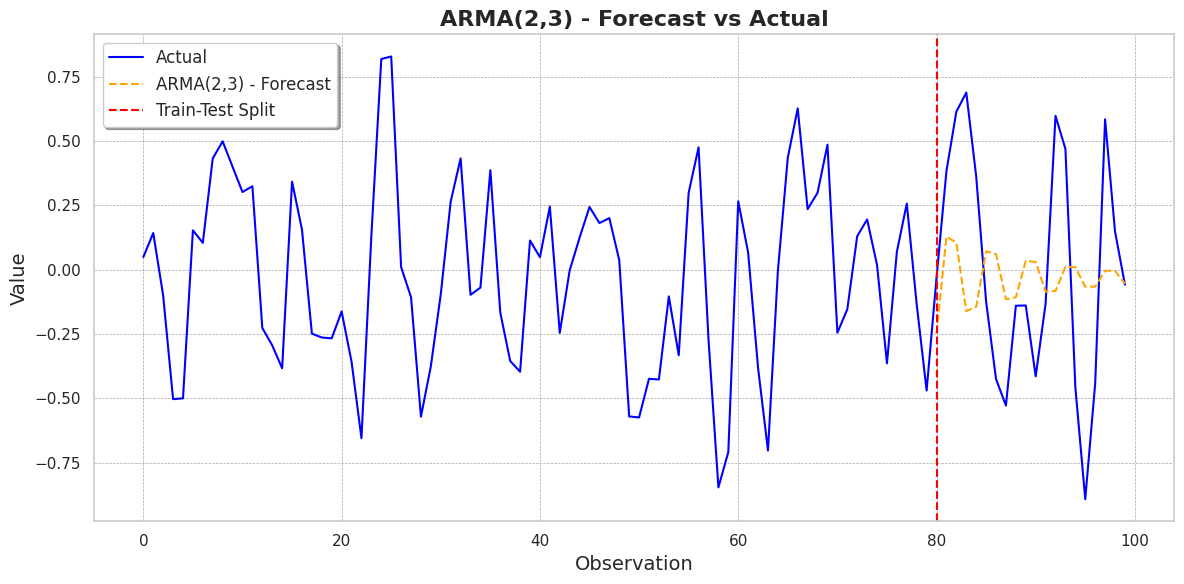

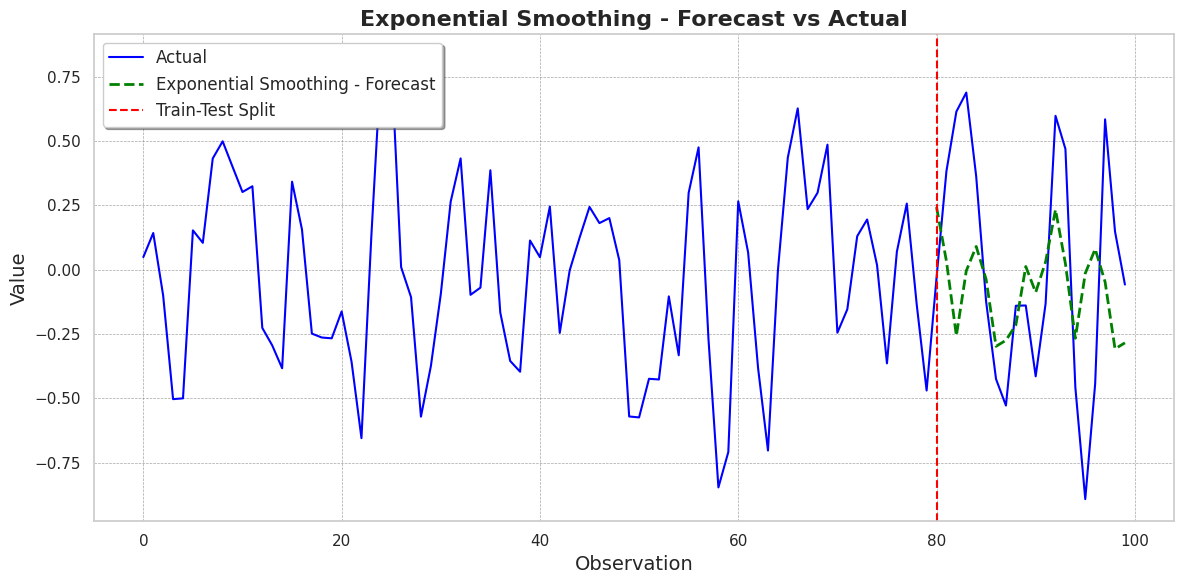

                   Model       MAE      RMSE    MAPE (%)
0              ARMA(1,1)  0.388956  0.452867  125.124971
1              ARMA(2,1)  0.375396  0.435722  124.816972
2              ARMA(2,2)  0.385033  0.450241  126.945557
3              ARMA(2,3)  0.383976  0.453146  122.075320
4  Exponential Smoothing  0.367913  0.437576  150.370447


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Split the data into 80% training and 20% testing
split_idx = int(len(y3) * 0.8)
train_data = y3[:split_idx]
test_data = y3[split_idx:]

# Function to calculate evaluation metrics
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

# Initialize a list to store the forecasting results
forecast_results = []

# 1. ARMA Model Forecasting
for model_name, order in models.items():
    if 'ARMA' in model_name:
        # Fit ARMA model on training data
        model = ARIMA(train_data, order=order)
        result = model.fit()

        # Forecast on the test set
        forecast = result.forecast(steps=len(test_data))

        # Calculate metrics for ARMA forecast
        mae, rmse, mape = calculate_metrics(test_data, forecast)

        # Store results for ARMA
        forecast_results.append({
            "Model": model_name,
            "MAE": mae,
            "RMSE": rmse,
            "MAPE (%)": mape
        })

        # Plot ARMA actual vs forecasted values
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(y3)), y3, label='Actual', color='blue', linestyle='-', linewidth=1.5)
        plt.plot(range(split_idx, len(y3)), forecast, label=f'{model_name} - Forecast', color='orange', linestyle='--', linewidth=1.5)
        plt.axvline(split_idx, color='red', linestyle='--', label='Train-Test Split')
        plt.title(f"{model_name} - Forecast vs Actual", fontsize=16, weight='bold')
        plt.xlabel("Observation", fontsize=14)
        plt.ylabel("Value", fontsize=14)
        plt.legend(fontsize=12, loc='upper left', frameon=True, fancybox=True, shadow=True)
        plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
        plt.tight_layout()
        plt.show()

# 2. Exponential Smoothing Forecasting
# Fit Exponential Smoothing model on training data
exp_smooth_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
exp_smooth_result = exp_smooth_model.fit()

# Forecast on the test set
exp_smooth_forecast = exp_smooth_result.forecast(steps=len(test_data))

# Calculate metrics for Exponential Smoothing forecast
exp_smooth_mae, exp_smooth_rmse, exp_smooth_mape = calculate_metrics(test_data, exp_smooth_forecast)

# Store results for Exponential Smoothing
forecast_results.append({
    "Model": "Exponential Smoothing",
    "MAE": exp_smooth_mae,
    "RMSE": exp_smooth_rmse,
    "MAPE (%)": exp_smooth_mape
})

# Plot Exponential Smoothing actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(range(len(y3)), y3, label='Actual', color='blue', linestyle='-', linewidth=1.5)
plt.plot(range(split_idx, len(y3)), exp_smooth_forecast, label='Exponential Smoothing - Forecast', color='green', linestyle='--', linewidth=2)
plt.axvline(split_idx, color='red', linestyle='--', label='Train-Test Split')
plt.title("Exponential Smoothing - Forecast vs Actual", fontsize=16, weight='bold')
plt.xlabel("Observation", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12, loc='upper left', frameon=True, fancybox=True, shadow=True)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# Display evaluation results for both ARMA and Exponential Smoothing models
forecast_results_df = pd.DataFrame(forecast_results)
print(forecast_results_df)


ACF, Q-statistics, and p-values:
    Lag       ACF     Q-Stat  p-value (Q-Stat)
0     1  0.465505  22.326124      2.300556e-06
1     2 -0.160728  25.014902      3.698989e-06
2     3 -0.321629  35.892622      7.890223e-08
3     4 -0.107753  37.126268      1.696570e-07
4     5 -0.051817  37.414549      4.945955e-07
5     6 -0.164985  40.368221      3.855755e-07
6     7 -0.099575  41.455697      6.617935e-07
7     8  0.128349  43.282101      7.772457e-07
8     9  0.179573  46.896527      4.102717e-07
9    10  0.034341  47.030181      9.324104e-07
10   11 -0.086982  47.897272      1.489158e-06
11   12 -0.113396  49.387694      1.789131e-06
12   13 -0.163961  52.539532      1.086564e-06
13   14 -0.057905  52.937213      1.949826e-06
14   15  0.115109  54.527218      2.143795e-06
15   16  0.254004  62.361568      2.083780e-07
16   17  0.046067  62.622364      3.854966e-07
17   18 -0.174542  66.411893      1.810539e-07
18   19 -0.150330  69.257707      1.221517e-07
19   20  0.010049  69.27058

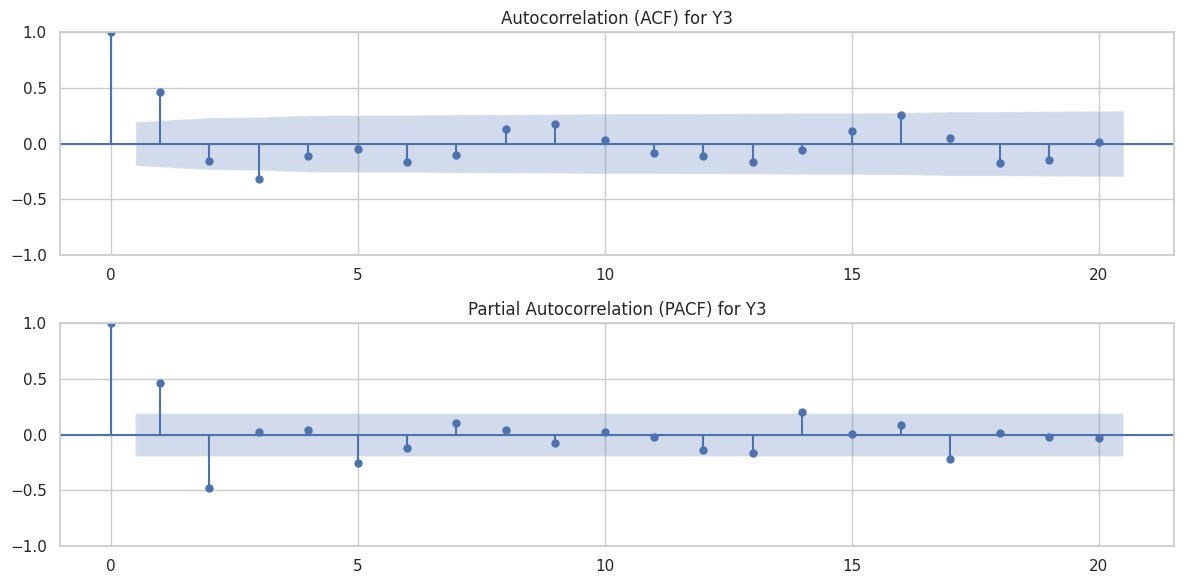

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, q_stat

# Step 2: Compute ACF and PACF values
acf_values, confint_acf, qstat, pvalues = acf(y3, nlags=20, qstat=True, alpha=0.05)
pacf_values, confint_pacf = pacf(y3, nlags=20, method='ywm', alpha=0.05)

# Step 3: Create a DataFrame for easy viewing of the results (ACF, Q-statistics, and p-values)
acf_table = pd.DataFrame({
    'Lag': range(1, len(qstat) + 1),  # Start from lag 1 to lag 20
    'ACF': acf_values[1:],  # Exclude the ACF value at lag 0
    'Q-Stat': qstat,
    'p-value (Q-Stat)': pvalues
})

# Print the ACF table neatly
print("ACF, Q-statistics, and p-values:")
print(acf_table)

# Step 4: Create a DataFrame for PACF values
pacf_table = pd.DataFrame({
    'Lag': range(len(pacf_values)),
    'PACF': pacf_values
})

# Print the PACF table neatly
print("\nPACF Values:")
print(pacf_table)

# Step 5: Plot ACF and PACF
plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(2, 1, 1)
plot_acf(y3, lags=20, ax=plt.gca(), title="Autocorrelation (ACF) for Y3")
plt.grid(True)

# Plot PACF
plt.subplot(2, 1, 2)
plot_pacf(y3, lags=20, ax=plt.gca(), method='ywm', title="Partial Autocorrelation (PACF) for Y3")
plt.grid(True)

plt.tight_layout()
plt.show()
